In [1]:
%matplotlib inline 

import numpy as np
import scipy
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
from mpl_toolkits.mplot3d import Axes3D #3D plotting
import datetime as dt # module for manipulating dates and times

import requests 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import binom
from __future__ import division
import re
from StringIO import StringIO
from zipfile import ZipFile 
from pandas import read_csv
from urllib import urlopen
import urllib2
import json

import sklearn
import sklearn.preprocessing
import sklearn.datasets

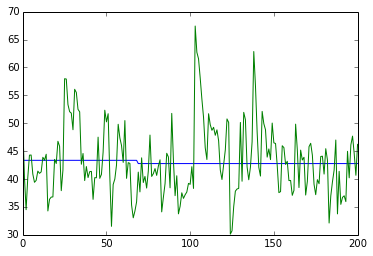

In [11]:
# LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue < MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        MMquantity[time] = quantityTrader                                       
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp((currentquantity+quantityTrader)/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        normalizedquantity = (quantityTrader + currentquantity)/MMb

        MMprice[time] = 100*(np.exp(normalizedquantity)/(1+np.exp(normalizedquantity)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

279.529183778
3860.54452819
-6785.19871068


array([-5151.52719656,  4727.3644262 ,  -920.64163675,   726.4723665 ,
        4765.49013452,   360.52527774,   755.84667339, -6397.68823269,
       -5127.03806405, -3886.50985055, -2810.04614654, -2251.47732736,
        1696.18223856,  2781.36604161, -4662.87313207,  2039.53749756,
       -5146.97489997,   439.10361516,  7342.85838069,   837.75507326,
        3998.12731835,   352.47174493,  8026.12641383, -4365.25305673,
       -4332.80597321, -2614.67370245,  3671.80272346,  2068.87244908,
        2231.31181469,  5756.13484421, -5178.80874098,  2864.27318012,
       -4765.56688077,  6671.64041139,  8312.33644002, -4978.46064528,
        7487.85412719, -5994.61168354, -3624.14314289, -2643.64640727,
        5799.0518258 ,  -295.65079817,  8048.24349145, -1409.95502663,
        1815.43319456,   202.16936318, -2370.24323889,  2652.55681425,
        3054.40959781,  3089.66369399,  1401.09506956,  2496.68232576,
       -3513.78842851, -2535.53640468,  -775.2204575 ,  3637.10751402,
      

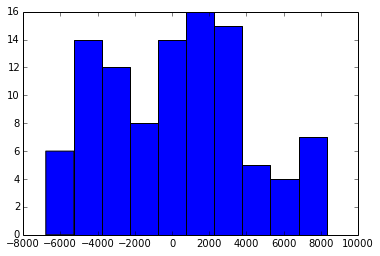

In [12]:
# Revenue Results 
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

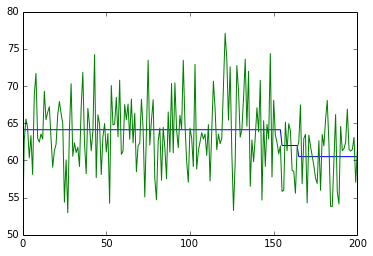

In [4]:
# LMSR Implementation Textbook Interpretation
iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue >= 100:
            traderValue = 99.99   
        # will trade till the instantaneous price is equal to trader's value 
        currentquantity = np.sum(MMquantity) 
        quantityTrader = np.log((traderValue/100)/(1-(traderValue/100)))*MMb-currentquantity
        MMquantity[time] = quantityTrader
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp((currentquantity+quantityTrader)/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        normalizedquantity = (quantityTrader + currentquantity)/MMb
        MMprice[time] = 100*(np.exp(normalizedquantity)/(1+np.exp(normalizedquantity)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)


1269.52753097
8368.29224766
-7116.13195261


(array([ 64.,  32.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -7116.13195261,   1006.03477853,   9128.20150968,  17250.36824082,
         25372.53497196,  33494.70170311,  41616.86843425,  49739.03516539,
         57861.20189654,  65983.36862768,  74105.53535883]),
 <a list of 10 Patch objects>)

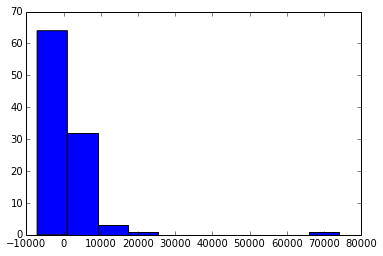

In [5]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

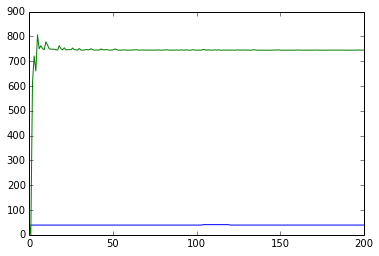

In [6]:
#Liquidity Sensitive LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    alpha = 10
        
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue < MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        MMb = alpha*currentquantity
        MMquantity[time] = quantityTrader                                       
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp((currentquantity+quantityTrader)/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        normalizedquantity = (quantityTrader + currentquantity)/MMb
        MMprice[time] = 100*(alpha*np.log(1+np.exp((currentquantity+quantityTrader)/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

In [10]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
trial
plt.hist(trial)


nan
nan
nan


array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,   0.])